In [110]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [112]:
conn = sqlite3.connect("customer_data.db")

cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS customers (
id INTEGER PRIMARY KEY AUTOINCREMENT,
name TEXT,
age INTEGER,
city TEXT,
total_spent_ REAL
)
""")

conn.commit()

In [114]:
customers = [
    ("Gustavo Aguiar", 28, "Vilhena", 132.75),
    ("Maurina Aguiar", 40, "Cerejeiras", 444.55),
    ("Heberty Aguair Siqueira", 33, "Cerejeiras", 136.55),
    ("Antonio Gilmar Jose Siqueira", 53, "Ariquemes", 953.55),
    ("Ana Paula Silva", 25, "Vilhena", 210.30),
    ("Carlos Eduardo Santos", 34, "Porto Velho", 512.90),
    ("Fernanda Lima", 29, "Ji-Paraná", 98.40),
    ("Marcos Vinicius Rocha", 41, "Cacoal", 745.00),
    ("Juliana Mendes", 36, "Rolim de Moura", 389.99),
    ("Rafael Nogueira", 22, "Ariquemes", 120.00),
    ("Patricia Oliveira", 45, "Guajará-Mirim", 860.75),
    ("Bruno Henrique Alves", 31, "Vilhena", 276.10),
    ("Luciana Pires", 38, "Cerejeiras", 433.80),
    ("Daniel Costa", 27, "Porto Velho", 154.60),
    ("Renata Freitas", 33, "Ji-Paraná", 310.25),
    ("Felipe Moreira", 26, "Cacoal", 89.90),
    ("Sandra Regina Lopes", 50, "Rolim de Moura", 980.00),
    ("Thiago Araujo", 35, "Ariquemes", 415.70),
    ("Camila Torres", 24, "Vilhena", 67.40),
    ("Leonardo Batista", 42, "Guajará-Mirim", 702.30),
    ("Michele Ribeiro", 28, "Cerejeiras", 198.50),
    ("Rodrigo Farias", 37, "Porto Velho", 560.90),
    ("Tatiane Cunha", 31, "Ji-Paraná", 245.00),
    ("Eduardo Martins", 48, "Cacoal", 820.60),
    ("Vanessa Barros", 29, "Rolim de Moura", 132.00),
    ("Diego Pacheco", 34, "Ariquemes", 377.45),
    ("Aline Guedes", 27, "Vilhena", 99.99),
    ("Paulo Henrique Lima", 39, "Guajará-Mirim", 640.80),
    ("Bianca Soares", 23, "Cerejeiras", 55.20),
    ("João Pedro Neves", 32, "Porto Velho", 410.00),
    ("Eliane Monteiro", 46, "Ji-Paraná", 905.30),
    ("Lucas Teixeira", 21, "Cacoal", 78.60),
    ("Simone Cardoso", 44, "Rolim de Moura", 690.40),
    ("Igor Malheiros", 30, "Ariquemes", 250.00),
    ("Cristiane Moraes", 35, "Vilhena", 488.90),
    ("Anderson Peixoto", 41, "Guajará-Mirim", 730.15),
    ("Priscila Rangel", 26, "Cerejeiras", 110.80),
    ("Alexandre Fonseca", 52, "Porto Velho", 999.99),
    ("Larissa Pontes", 28, "Ji-Paraná", 205.60),
    ("Henrique Macedo", 33, "Cacoal", 312.45),
    ("Rosana Furtado", 47, "Rolim de Moura", 875.00),
    ("Vinicius Lobo", 24, "Ariquemes", 95.30),
    ("Daniela Rezende", 38, "Vilhena", 540.70),
    ("Sergio Almeida", 55, "Guajará-Mirim", 920.00),
    ("Natalia Queiroz", 29, "Cerejeiras", 180.90),
    ("Matheus Prado", 34, "Porto Velho", 360.20),
    ("Adriana Valente", 43, "Ji-Paraná", 770.80),
    ("Renan Guimarães", 27, "Cacoal", 140.00),
    ("Claudia Meireles", 51, "Rolim de Moura", 890.60),
    ("Pedro H. Ribeiro", 31, "Ariquemes", 299.99),
    ("Elaine Souto", 36, "Vilhena", 455.50),
    ("Fábio Kuster", 48, "Guajará-Mirim", 810.40),
    ("Isabela Rios", 22, "Cerejeiras", 65.00),
    ("Rogério França", 40, "Porto Velho", 620.30),
    ("Silvia Bastos", 34, "Ji-Paraná", 315.75),
    ("Caio Ventura", 28, "Cacoal", 185.20),
    ("Denise Albuquerque", 49, "Rolim de Moura", 940.90),
    ("Guilherme Paes", 26, "Ariquemes", 115.80),
    ("Mariana Coutinho", 37, "Vilhena", 505.00),
    ("Nelson Barcellos", 58, "Guajará-Mirim", 870.25),
    ("Beatriz Falcão", 24, "Cerejeiras", 72.10),
    ("Otavio Salles", 35, "Porto Velho", 430.60),
    ("Helena Braga", 42, "Ji-Paraná", 790.45),
    ("Samuel Corrêa", 29, "Cacoal", 160.90),
    ("Lúcia Brandão", 54, "Rolim de Moura", 915.00),
    ("Jonas Medeiros", 33, "Ariquemes", 280.75),
    ("Raquel Nascimento", 27, "Vilhena", 125.40),
    ("Everaldo Tavares", 46, "Guajará-Mirim", 860.60),
    ("Sabrina Lemos", 31, "Cerejeiras", 240.00),
    ("Douglas Antunes", 38, "Porto Velho", 590.90),
    ("Flavia Paiva", 35, "Ji-Paraná", 335.30),
    ("Murilo Abreu", 23, "Cacoal", 82.50),
    ("Teresa Pacheco", 57, "Rolim de Moura", 970.80),
    ("Yago Freire", 28, "Ariquemes", 150.00),
    ("Patrícia Dorneles", 41, "Vilhena", 680.20),
    ("Ronaldo Siqueira", 50, "Guajará-Mirim", 905.90),
    ("Kelly Muniz", 34, "Cerejeiras", 410.10),
    ("Victor Holanda", 26, "Porto Velho", 190.00),
    ("Monica Seabra", 45, "Ji-Paraná", 830.40),
    ("Alan Figueiredo", 32, "Cacoal", 275.60),
    ("Rita Magalhães", 56, "Rolim de Moura", 950.75),
    ("Pablo Moretto", 29, "Ariquemes", 165.80),
    ("Carolina Xavier", 37, "Vilhena", 520.00),
    ("Osvaldo Cunha", 60, "Guajará-Mirim", 990.00)
]

In [116]:
cursor.executemany ("INSERT INTO customers (name, age, city, total_spent_) VALUES (?, ?, ?, ?)", customers)

conn.commit()

In [118]:
query = "SELECT * FROM customers"
df = pd.read_sql(query, conn)
df.head()

,id,name,age,city,total_spent_
0,1,Gustavo Aguiar,28,Vilhena,132.75
1,2,Maurina Aguiar,40,Cerejeiras,444.55
2,3,Heberty Aguair Siqueira,33,Cerejeiras,136.55
3,4,Antonio Gilmar Jose Siqueira,53,Misissip,953.55
4,5,Gustavo Aguiar,28,Vilhena,132.75


In [120]:
query = "SELECT * FROM customers WHERE total_spent_ > 200"
pd.read_sql(query, conn)

,id,name,age,city,total_spent_
0,2,Maurina Aguiar,40,Cerejeiras,444.55
1,4,Antonio Gilmar Jose Siqueira,53,Misissip,953.55
2,6,Maurina Aguiar,40,Cerejeiras,444.55
3,8,Antonio Gilmar Jose Siqueira,53,Mississip,953.55
4,9,Ana Paula Silva,25,Vilhena,210.30
...,...,...,...,...,...
287,419,Monica Seabra,45,Ji-Paraná,830.40
288,420,Alan Figueiredo,32,Cacoal,275.60
289,421,Rita Magalhães,56,Rolim de Moura,950.75
290,423,Carolina Xavier,37,Vilhena,520.00


In [122]:
query = "SELECT AVG(age) AS avarage_age FROM customers"
pd.read_sql(query, conn)

,avarage_age
0,36.271226


In [124]:
query = "SELECT city, COUNT(*) AS num_customers FROM customers GROUP BY city"
pd.read_sql(query, conn)

,city,num_customers
0,Ariquemes,53
1,Cacoal,50
2,Cerejeiras,57
3,Guajará-Mirim,50
4,Ji-Paraná,50
5,Misissip,2
6,Mississip,1
7,Porto Velho,50
8,Rolim de Moura,50
9,Vilhena,61


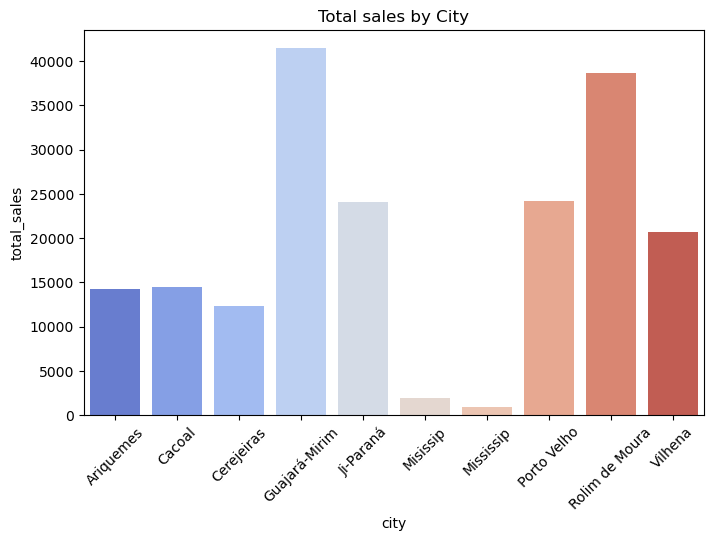

In [126]:
query = " SELECT city, SUM(total_spent_) AS total_sales FROM customers GROUP BY city"
df_sales = pd.read_sql(query, conn)

plt.figure(figsize = (8, 5))
sns.barplot(x = "city", y = "total_sales", data = df_sales, palette = "coolwarm")
plt.xticks(rotation = 45)
plt.title("Total sales by City")
plt.show()












In [134]:
cursor.execute("""
DELETE FROM customers
WHERE city IN ('Mississip', 'Misissip')
""")

conn.commit()

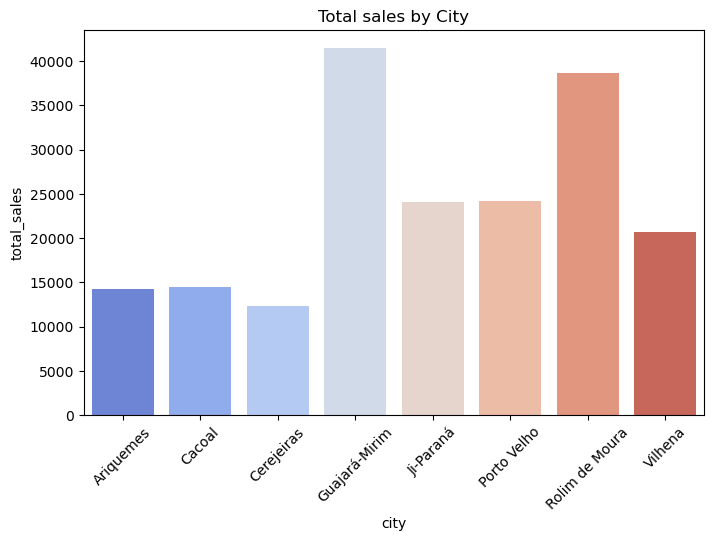

In [136]:
query = " SELECT city, SUM(total_spent_) AS total_sales FROM customers GROUP BY city"
df_sales = pd.read_sql(query, conn)

plt.figure(figsize = (8, 5))
sns.barplot(x = "city", y = "total_sales", data = df_sales, palette = "coolwarm")
plt.xticks(rotation = 45)
plt.title("Total sales by City")
plt.show()

In [140]:
conn.close()

In [146]:
!cd

C:\Users\gusta\Desktop\AUTOESTUDO\roadmap data science\mysql_jupyter


In [148]:
!ls

'ls' nÆo ‚ reconhecido como um comando interno
ou externo, um programa oper vel ou um arquivo em lotes.
